Image: generated_image.png
Caption: a man on a motorcycle with a hat and jacket


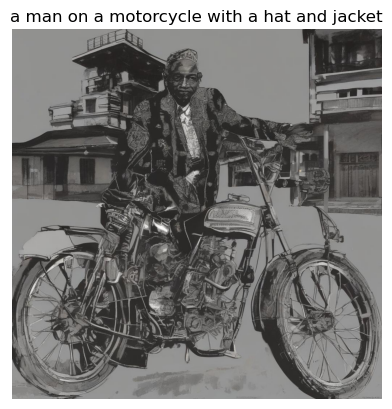

In [2]:
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

def caption_image(image_path):
    processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
    model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
    
    image = Image.open(image_path).convert('RGB')
    inputs = processor(image, return_tensors="pt")

    output = model.generate(**inputs, max_length=30)
    caption = processor.decode(output[0], skip_special_tokens=True)
    
    return caption

def main():
    image_path = "generated_image.png"
    
    try:
        caption = caption_image(image_path)
        print(f"Image: {image_path}")
        print(f"Caption: {caption}")
        
        from matplotlib import pyplot as plt
        image = Image.open(image_path)
        plt.imshow(image)
        plt.axis('off')
        plt.title(caption)
        plt.show()
        
    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    main()